In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
filename = 'Tabelle_Coronavirus-Faelle-BW.xlsx'
dfi = pd.read_excel(filename, sheet_name='Infizierte Coronavirus in BW', header=None)
dft = pd.read_excel(filename, sheet_name='Todesfälle Coronavirus in BW', header=None)

In [3]:
ctyI = np.nan_to_num(np.asarray(dfi))
ctyT = np.nan_to_num(np.asarray(dft))
# row 7: dates
# row 8 to 51: regions
    # row 18: Freiburg
    # row 38: Ravensburg
# row 52: sum

I1: True
T1: True
dIdt: True
checksum: True


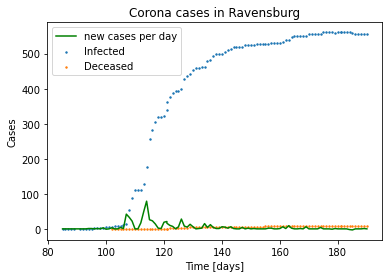

In [7]:
index = 37
region = ctyI[index][0]
title = 'Corona cases in %s' % region

# calculate x data: dates
xI = [el.day+el.month*30 if type(el) == datetime.datetime else False for el in ctyI[6]]
xT = [el.day+el.month*30 if type(el) == datetime.datetime else False for el in ctyT[6]]

# calculate trajectory points from data of given index
yI = [el if type(el) == int else False for el in ctyI[index]]
yT = [el if type(el) == int else False for el in ctyT[index]]

# calculate total sum
yI_total = [el for el in ctyI[51]]
del yI_total[0]

# remove first element of lists (column of regions, only str in these)
del xI[0]
del xT[0]
del yI[0]
del yT[0]

# Calculate new cases per day
dyIdt = []
for i in range(len(yI)):
    dyIdt.append(yI[i-1] - yI[i] if yI[i-1] > 0 else False)

# Checking for mistakes
print('I1:', len(xI) == len(yI))
print('T1:', len(xT) == len(yT))
print('dIdt:', len(dyIdt) == len(xI))
checksum = 0
for el in dyIdt:
    checksum += el
print("checksum:", checksum == yI[0])

# Plot infected, deceased and new cases per day
plt.scatter(xI, yI, label='Infected', s=2)
plt.scatter(xT, yT, label='Deceased', s=2)
plt.plot(xI, dyIdt, label='new cases per day', c='g')
plt.xlabel('Time [days]')
plt.ylabel('Cases')
plt.title(title)
plt.legend(loc='upper left')
plt.savefig('BWCases.png')

In [ ]:
%matplotlib notebook
yItotal=np.flip(np.sum(ctyI,axis=0))
gesternI=yItotal-np.roll(yItotal,1)
gesternI[0]=0
yTtotal=np.insert(np.flip(np.sum(ctyT,axis=0)),0,np.zeros(16))
gesternT=yTtotal-np.roll(yTtotal,1)
gesternT[0]=0
plt.plot(gesternI,label='Infected')
plt.plot(gesternT,label='Deceased')
plt.xlabel('Time [days]')
plt.ylabel('Increase of cases per day')
plt.title('Corona cases in Baden-Württemberg')
plt.legend(loc='upper left')
plt.savefig('DeltaBWCases.png')

In [ ]:
yItotal.shape


In [ ]:
yTtotal.shape

In [ ]:
ctyT.shape